# Plots for validated Data 

In [71]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown
pd.option_context('display.max_columns', -1)
pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution
#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [72]:
#Merge with SModelS DataFrame
dataDF = pd.read_pickle('/home/yoxara/smodels/smodels-database/13TeV/ATLAS/ATLAS-EXOT-2019-03/validation/Simp_Axial_Vector.pcl')
#print(dataDF.columns.values.tolist()) #Print all columns names#
dataDF

,filename,mass.5000001,mass.5000521,extpar.1,extpar.2,extpar.3,extpar.4,xsec13TeV(fb).5000001,"BRs.y1.q,q","BRs.y1.c,c","BRs.y1.b,b","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,run_95_tag_1.slha,3.750000e+03,1.000000e+04,0.000000e+00,1.500000e+00,1.297300e-01,0.000000e+00,3.176134e+00,1.670176e-01,1.670175e-01,1.670160e-01,1.649138e-01,3.176134e+00,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",5.237883e-01,0.000000e+00,3.176134e+00,0.000000e+00,0.000000e+00,50,2.000000e-01,1,/home/yoxara/smodels/smodels-database/13TeV/AT...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/smodels/smodels-database/13TeV/AT...,3.0.0-beta,3.0.0-beta,0.000000e+00,2.652346e+00,6.137560e+00,6.746770e+00,[TRV1jj],"[(y1, 3750.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.360000e+02,upperLimit,4.321499e-01,3.931283e-01,"[(y1, prompt)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,run_61_tag_1_3rd.slha,2.350000e+03,1.000000e+04,0.000000e+00,1.500000e+00,5.900000e-01,0.000000e+00,1.504581e+03,1.675602e-01,1.675599e-01,1.675562e-01,1.622034e-01,1.504581e+03,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",2.440482e+02,0.000000e+00,1.504581e+03,0.000000e+00,0.000000e+00,50,2.000000e-01,1,/home/yoxara/smodels/smodels-database/13TeV/AT...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/smodels/smodels-database/13TeV/AT...,3.0.0-beta,3.0.0-beta,0.000000e+00,1.260533e+03,3.600120e+01,3.054110e+01,[TRV1jj],"[(y1, 2350.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.360000e+02,upperLimit,3.501364e+01,4.127333e+01,"[(y1, prompt)]"


In [73]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 3)
pd.set_option('display.float_format', '{:e}'.format)
#dataDF = dataDF[dataDF['extpar.3'] > 0.1].reset_index(drop=True)
dataDF

,filename,mass.5000001,mass.5000521,extpar.1,extpar.2,extpar.3,extpar.4,xsec13TeV(fb).5000001,"BRs.y1.q,q","BRs.y1.c,c","BRs.y1.b,b","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,run_95_tag_1.slha,3.750000e+03,1.000000e+04,0.000000e+00,1.500000e+00,1.297300e-01,0.000000e+00,3.176134e+00,1.670176e-01,1.670175e-01,1.670160e-01,1.649138e-01,3.176134e+00,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",5.237883e-01,0.000000e+00,3.176134e+00,0.000000e+00,0.000000e+00,50,2.000000e-01,1,/home/yoxara/smodels/smodels-database/13TeV/AT...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/smodels/smodels-database/13TeV/AT...,3.0.0-beta,3.0.0-beta,0.000000e+00,2.652346e+00,6.137560e+00,6.746770e+00,[TRV1jj],"[(y1, 3750.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.360000e+02,upperLimit,4.321499e-01,3.931283e-01,"[(y1, prompt)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,run_61_tag_1_3rd.slha,2.350000e+03,1.000000e+04,0.000000e+00,1.500000e+00,5.900000e-01,0.000000e+00,1.504581e+03,1.675602e-01,1.675599e-01,1.675562e-01,1.622034e-01,1.504581e+03,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",2.440482e+02,0.000000e+00,1.504581e+03,0.000000e+00,0.000000e+00,50,2.000000e-01,1,/home/yoxara/smodels/smodels-database/13TeV/AT...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/smodels/smodels-database/13TeV/AT...,3.0.0-beta,3.0.0-beta,0.000000e+00,1.260533e+03,3.600120e+01,3.054110e+01,[TRV1jj],"[(y1, 2350.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.360000e+02,upperLimit,3.501364e+01,4.127333e+01,"[(y1, prompt)]"


#### Set r = 0 for points with no results 

In [74]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)


#### Define exclusions

In [75]:
#Add simple flag for excluded points:
dataDF['excludedLHC'] = dataDF['ExptRes.result0.r'] > 1.0


### Get points excluded:

In [76]:
excluded = dataDF[dataDF['excludedLHC'] == True]

allowed = dataDF[(dataDF['excludedLHC'] == False)]


print('Total number of points = %i' %len(dataDF))
print('Total excluded (LHC) = %i'%(len(excluded)))
print('Total allowed = %i\n'%(len(allowed)))

# print('Total excluded (r > %1.2f) = %i'%(rscale,len(excludedSC)))
# print('Total allowed (r > %1.2f) = %i'%(rscale,len(allowedSC)))


Total number of points = 464
Total excluded (LHC) = 301
Total allowed = 163



### Create analysis label for excluded points

In [77]:
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True,ascending=False)

    
labels = []
for index, row in excluded.iterrows():
    ana = row['ExptRes.result0.AnalysisID']
    txList = sorted(row['ExptRes.result0.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    label = label.replace('off','') #Group together on and off-shell topologies
    labels.append(label)
excluded['label'] = labels


In [78]:
nexcluded = [[len(excluded[excluded['label'] == label]),label] for label in excluded['label'].unique()]
nexcluded = sorted(nexcluded,reverse=True)
nexcluded = np.array(nexcluded)
print(excluded.shape)


(301, 57)


In [79]:
for label in nexcluded[:,1]:
    print(label+': %i'%len(excluded[excluded['label'] == label]))
    

ATLAS-EXOT-2019-03 (TRV1jj): 301


In [80]:
#data_exp = pd.read_pickle('/home/yoxara/smodels/smodels-database/13TeV/ATLAS/ATLAS-EXOT-2019-03/orig/mg5/UL_exp.pcl')
#data_obs = pd.read_pickle('/home/yoxara/smodels/smodels-database/13TeV/ATLAS/ATLAS-EXOT-2019-03/orig/mg5/UL_obs.pcl')
data_exp = pd.read_pickle('/home/yoxara/smodels/smodels-database/13TeV/ATLAS/ATLAS-EXOT-2019-03/orig/mg5/xsecBR_UL_Exp.pcl')
data_obs = pd.read_pickle('/home/yoxara/smodels/smodels-database/13TeV/ATLAS/ATLAS-EXOT-2019-03/orig/mg5/xsecBR_UL_Obs.pcl')
MY1 = data_obs['MZp_Obs']
gqExp = data_exp['gq_Exp']
gqObs = data_obs['gq_Obs']
#xsec en pb
#xsecExp_pb = data_exp['weight [pb]']
#xsecObs_pb = data_obs['weight [pb]']
xsecExp_pb = data_exp['weight_pb_exp']
xsecObs_pb = data_obs['weight_pb_obs']
#xsec: pb to fb
xsecExp_fb = [x * 1000 for x in xsecExp_pb]
xsecObs_fb = [x * 1000 for x in xsecObs_pb]
xsecExp_fb
gqObs

0   5.567660e-02
        ...     
6   7.163190e-01
Name: gaq, Length: 7, dtype: float64

### Define colors and plotting order

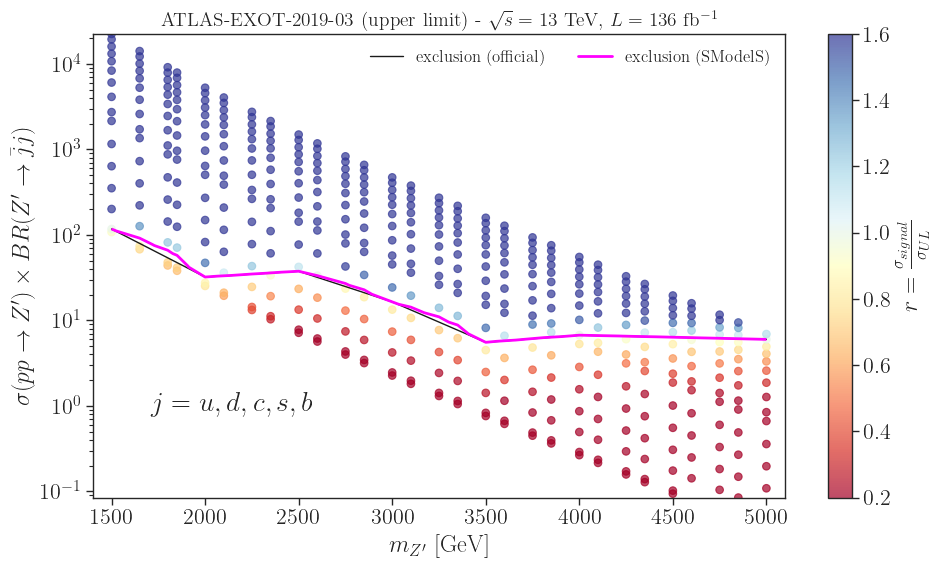

In [98]:
from scipy.interpolate import griddata, RectBivariateSpline
cm = plt.colormaps['RdYlBu']
plt.figure(figsize=(10,6))
#dataDF = dataDF[dataDF['extpar.3'] < 2].reset_index(drop=True)
#dataDF = dataDF[dataDF['mass.5000001'] <= 5100].reset_index(drop=True)
#dataDF = dataDF[dataDF['mass.5000001'] >= 1500].reset_index(drop=True)
observed_line, = plt.plot(MY1, xsecObs_fb, 'k', linewidth=1, label='exclusion (official)')
x = dataDF['mass.5000001']
y = dataDF['xsec13TeV(fb).5000001'] * (3*dataDF['BRs.y1.q,q'] + dataDF['BRs.y1.c,c'] + dataDF['BRs.y1.b,b'])
c = dataDF['ExptRes.result0.r']
order = c.argsort()
x, y, c = x.iloc[order], y.iloc[order], c.iloc[order]
sc = plt.scatter(x, y, c=c, s = 30, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.7)
levels = [1.0]  
cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)

#x_grid_obs = np.linspace(min(x), max(x), num=10000)  
#y_grid_obs = np.linspace(min(y), max(y), num=10000) 
#x_grid_obs, y_grid_obs = np.meshgrid(x_grid_obs, y_grid_obs)
#c_grid_obs = griddata((x, y), c, (x_grid_obs, y_grid_obs), method='linear')
#contour_line_obs = plt.contour(x_grid_obs, y_grid_obs, c_grid_obs, colors='magenta', levels=[1.0]).collections[0].get_paths()[0].vertices

smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
plt.text(0.2, 0.2, r'$j=u,d,c,s,b$', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=20)

plt.legend(handles=[observed_line, smodels_proxy], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{j} j)$')
plt.xlim(1400, 5100)
plt.yscale('log')
#plt.xscale('log')
plt.title('ATLAS-EXOT-2019-03 (upper limit)  -  $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$', fontsize=14) #- Leptophobic $Z^{\prime}$ model (axial-vector)', fontsize=14)
plt.savefig('ATLAS-EXOT-2019-03_xsec_UL_observed.png')
plt.tight_layout()
plt.show()



In [82]:
contour_line_cs = cs.collections[0].get_paths()[0].vertices
contour_x_cs = contour_line_cs[:, 0]
contour_y_cs = contour_line_cs[:, 1]
contour_interpolator_cs = interp1d(contour_x_cs, contour_y_cs, kind='linear', bounds_error=False, fill_value='extrapolate')
contour_y_cs_at_MY1 = contour_interpolator_cs(MY1)
experved_derivative = np.gradient(xsecObs_fb, MY1)
contour_derivative_cs = np.gradient(contour_y_cs_at_MY1, MY1)
ratio= experved_derivative / contour_derivative_cs
print(ratio)

[1.00000599 1.00000553 0.99999405 1.00000062 1.00000455 1.00000102
 0.99999398]


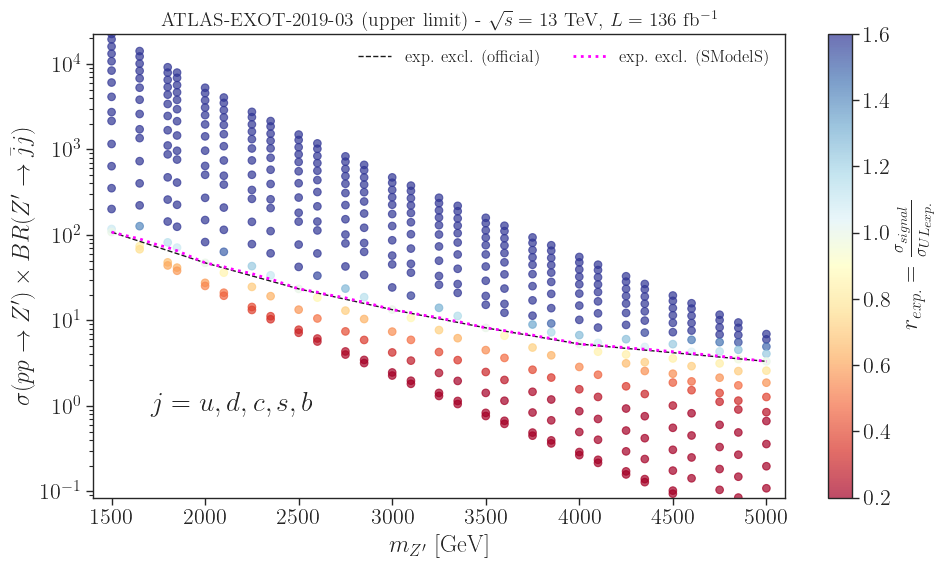

In [99]:
cm = plt.colormaps['RdYlBu']

plt.figure(figsize=(10,6))

dataDF = dataDF[dataDF['extpar.3'] < 2].reset_index(drop=True)
dataDF = dataDF[dataDF['mass.5000001'] <= 5100].reset_index(drop=True)
dataDF = dataDF[dataDF['mass.5000001'] >= 1500].reset_index(drop=True)

Expected_line, = plt.plot(MY1, xsecExp_fb, 'k--', linewidth=1, label='exp. excl. (official)')

x = dataDF['mass.5000001']
y = dataDF['xsec13TeV(fb).5000001'] * (3*dataDF['BRs.y1.q,q'] + dataDF['BRs.y1.c,c'] + dataDF['BRs.y1.b,b'])
ce = dataDF['ExptRes.result0.r_expected']
order = c.argsort()
x, y, ce = x.iloc[order], y.iloc[order], ce.iloc[order]
sc = plt.scatter(x, y, c=ce, s = 30, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.7)
levels = [1.0]  
cs_exp = plt.tricontour(x, y, ce, levels=levels, colors='magenta', linestyles=':', linewidths=2.)
#x_grid_exp = np.linspace(min(x), max(x), num=10000)  
#y_grid_exp = np.linspace(min(y), max(y), num=10000) 
#x_grid_exp, y_grid_exp = np.meshgrid(x_grid_exp, y_grid_exp)
#c_grid_exp = griddata((x, y), ce, (x_grid_exp, y_grid_exp), method='linear')
#contour_line_exp = plt.contour(x_grid_exp, y_grid_exp, c_grid_exp, colors='magenta', levels=[1.0]).collections[0].get_paths()[0].vertices

smodels_proxyE = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle=':', label='exp. excl. (SModelS)')
plt.text(0.2, 0.2, r'$j=u,d,c,s,b$', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=20)

plt.legend(handles=[Expected_line, smodels_proxyE], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r_{exp.} = \frac{\sigma_{signal}}{\sigma_{UL_{exp.}}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{j} j)$')
plt.xlim(1400, 5100)
plt.yscale('log')
#plt.xscale('log')
plt.title('ATLAS-EXOT-2019-03 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$', fontsize=14) #- Leptophobic $Z^{\prime}$ model (axial-vector)', fontsize=14)
plt.savefig('ATLAS-EXOT-2019-03_xsec_UL_expected.png')
plt.tight_layout()
plt.show()


In [84]:
contour_line_cs = cs_exp.collections[0].get_paths()[0].vertices
contour_x_cs = contour_line_cs[:, 0]
contour_y_cs = contour_line_cs[:, 1]
contour_interpolator_cs = interp1d(contour_x_cs, contour_y_cs, kind='linear', bounds_error=False, fill_value='extrapolate')
contour_y_cs_at_MY1 = contour_interpolator_cs(MY1)
experved_derivative = np.gradient(xsecExp_fb, MY1)
contour_derivative_cs = np.gradient(contour_y_cs_at_MY1, MY1)
ratio= experved_derivative / contour_derivative_cs
print(ratio)

[1.00000242 1.00000077 0.99999833 1.0000018  1.00000084 1.00000116
 0.99999892]


In [85]:
dataDF['xsec13TeV(fb).5000001'] * (3*dataDF['BRs.y1.q,q'] + dataDF['BRs.y1.c,c'] + dataDF['BRs.y1.b,b'])


0     8.327941e+03
          ...     
463   8.485257e-02
Length: 464, dtype: float64

In [86]:
dataDF['ExptRes.result0.theory prediction (fb)']

0     8.327941e+03
          ...     
463   8.485257e-02
Name: ExptRes.result0.theory prediction (fb), Length: 464, dtype: float64

In [87]:
dataDF['ExptRes.result0.r']

0     1.323025e+03
          ...     
463   1.387675e-02
Name: ExptRes.result0.r, Length: 464, dtype: float64

In [88]:
dataDF['ExptRes.result0.theory prediction (fb)']/dataDF['ExptRes.result0.upper limit (fb)']

0     1.323025e+03
          ...     
463   1.387675e-02
Length: 464, dtype: float64

In [89]:
filenames_to_exclude = [
    'run_141_tag_1.slha',
    'run_142_tag_1.slha',
    'run_143_tag_1.slha',
    'run_131_tag_1.slha',
    'run_132_tag_1.slha',
    'run_209_tag_1_3rd.slha',
    'run_210_tag_1_3rd.slha',
    'run_193_tag_1_3rd.slha',
    'run_194_tag_1_3rd.slha'
]
dataDF = dataDF[~dataDF['filename'].isin(filenames_to_exclude)]
#print(dataDF)
dataDF

,filename,mass.5000001,mass.5000521,extpar.1,extpar.2,extpar.3,extpar.4,xsec13TeV(fb).5000001,"BRs.y1.q,q","BRs.y1.c,c","BRs.y1.b,b","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV),excludedLHC
9,run_06_tag_1_2nd.slha,1.500000e+03,1.000000e+04,0.000000e+00,1.500000e+00,7.700000e-01,0.000000e+00,2.655834e+04,1.688592e-01,1.688585e-01,1.688493e-01,1.557145e-01,2.655834e+04,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",4.135519e+03,0.000000e+00,2.655834e+04,0.000000e+00,0.000000e+00,50,2.000000e-01,1,/home/yoxara/smodels/smodels-database/13TeV/AT...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/smodels/smodels-database/13TeV/AT...,3.0.0-beta,3.0.0-beta,0.000000e+00,2.242282e+04,1.172950e+02,1.079320e+02,[TRV1jj],"[(y1, 1500.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.360000e+02,upperLimit,1.911660e+02,2.077495e+02,"[(y1, prompt)]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,run_211_tag_1_3rd.slha,4.850000e+03,1.000000e+04,0.000000e+00,1.500000e+00,7.289680e-02,0.000000e+00,1.016952e-01,1.668764e-01,1.668764e-01,1.668755e-01,1.656188e-01,1.016952e-01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",1.684264e-02,0.000000e+00,1.016952e-01,0.000000e+00,0.000000e+00,50,2.000000e-01,1,/home/yoxara/smodels/smodels-database/13TeV/AT...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/smodels/smodels-database/13TeV/AT...,3.0.0-beta,3.0.0-beta,0.000000e+00,8.485257e-02,6.114730e+00,3.619950e+00,[TRV1jj],"[(y1, 4850.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.360000e+02,upperLimit,1.387675e-02,2.344026e-02,"[(y1, prompt)]",False


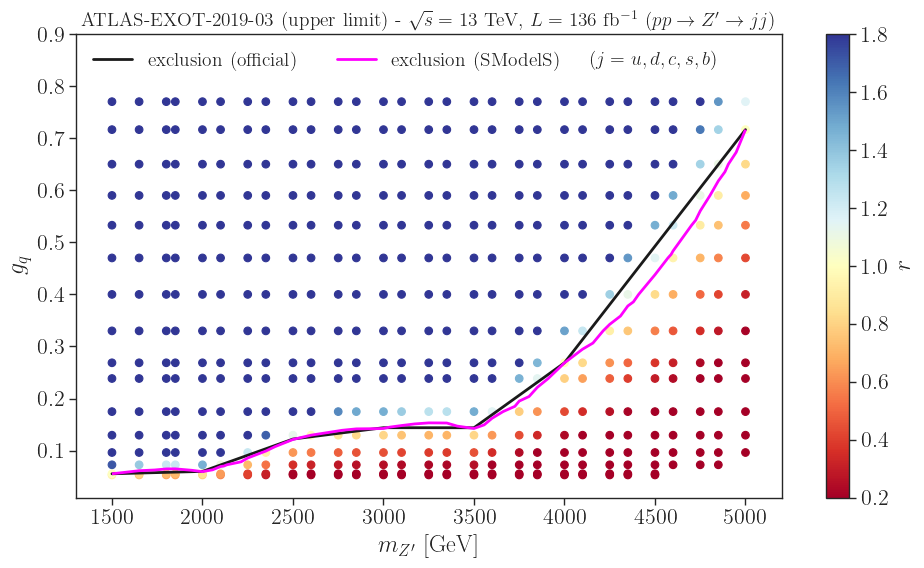

In [90]:
from scipy.interpolate import Rbf
from scipy.interpolate import griddata
dataDF = dataDF[dataDF['extpar.3'] > 0.053].reset_index(drop=True)

plt.figure(figsize=(10,6))
x = dataDF['mass.5000001']
y = dataDF['extpar.3']
c = dataDF['ExptRes.result0.r']
x = x[c.argsort()]
y = y[c.argsort()]
c = c[c.argsort()]
sc = plt.scatter(x,y,c=c,s = 30,cmap=cm, vmin=2e-1,vmax=1.8e0)
observed_line, = plt.plot(MY1, gqObs, 'k', linewidth=2, label='exclusion (official)')
levels = [1.0]  
cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
# Define the grid of points (x, y)
#x_grid = np.linspace(1300, 5200, num=100)  # Adjust the number of points as needed
#y_grid = np.linspace(0.01, 0.9, num=100)    # Adjust the number of points as needed
#x_grid, y_grid = np.meshgrid(x_grid, y_grid)
# Perform interpolation of cs on the grid
#c_grid = griddata((x, y), c, (x_grid, y_grid), method='linear')
# Plot the interpolation using plt.contour
#contour = plt.contour(x_grid, y_grid, c_grid, levels=[1.0], colors='magenta', linestyles='solid', linewidths=2.)
#contour_line = plt.contour(x_grid, y_grid, c_grid, levels=[1.0]).collections[0].get_paths()[0].vertices
# Define the grid of points (x, y)
#x_grid_obs = np.linspace(1300, 5200, num=1000)
#y_grid_obs = np.linspace(0.001, 0.9, num=1000)
#x_grid_obs, y_grid_obs = np.meshgrid(x_grid_obs, y_grid_obs)
# Perform interpolation of c on the grid
#c_grid_obs = griddata((x, y), c, (x_grid_obs, y_grid_obs), method='linear')
# Find the (x, y) coordinates of the contour line where c is approximately 1.0
# This will give us a collection of points that make up the contour line
#contour_line_obs = plt.contour(x_grid_obs, y_grid_obs, c_grid_obs, colors='magenta', levels=[1.0]).collections[0].get_paths()[0].vertices
plt.legend(handles=[observed_line, smodels_proxy], loc='upper left', framealpha=0.0, fontsize=14,ncol=2)
plt.colorbar(sc, label=r'$r$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$g_{q}$')
plt.clim(1e-1,2e0)
plt.xlim(1300, 5200)
plt.ylim(0.01, 0.9)
plt.text(4500, 0.85, r'($j = u,d,c,s,b$)', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.title(r'ATLAS-EXOT-2019-03 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$  ($ p p \to Z^{\prime} \to j j$)', fontsize=14) #- Leptophobic $Z^{\prime}$ model (axial-vector)', fontsize=14)
plt.tight_layout()
plt.savefig('ATLAS-EXOT-2019-03_gq_UL2.png')
plt.show()

In [91]:
contour_line_cs = cs.collections[0].get_paths()[0].vertices
contour_x_cs = contour_line_cs[:, 0]
contour_y_cs = contour_line_cs[:, 1]
contour_interpolator_cs = interp1d(contour_x_cs, contour_y_cs, kind='linear', bounds_error=False, fill_value='extrapolate')
contour_y_cs_at_MY1 = contour_interpolator_cs(MY1)
experved_derivative = np.gradient(gqObs, MY1)
contour_derivative_cs = np.gradient(contour_y_cs_at_MY1, MY1)
ratio= experved_derivative / contour_derivative_cs
print(ratio)

[1.10310284 1.01193289 1.0128468  1.02828161 0.98942219 0.99481799
 0.9999462 ]


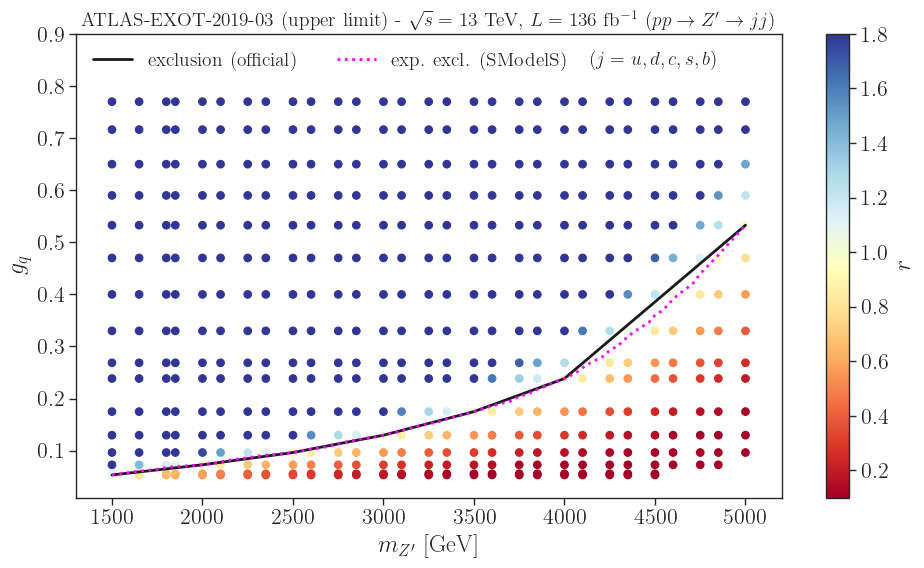

In [92]:
plt.figure(figsize=(10,6))
x = dataDF['mass.5000001']
y = dataDF['extpar.3']
c = dataDF['ExptRes.result0.r_expected']
x = x[c.argsort()]
y = y[c.argsort()]
c = c[c.argsort()]
sc = plt.scatter(x,y,c=c,s = 30,cmap=cm, vmin=1e-1,vmax=1.8e0)
expected_line, = plt.plot(MY1, gqExp, 'k', linewidth=2, label='exclusion (official)')
levels = [1.0]  
cs_exp = plt.tricontour(x, y, c, levels=levels, linestyles=':', colors='magenta',  linewidths=2.)
#x_grid_exp = np.linspace(1300, 5200, num=1000)
#y_grid_exp = np.linspace(0.001, 0.9, num=1000)
#x_grid_exp, y_grid_exp = np.meshgrid(x_grid_exp, y_grid_exp)
#c_grid_exp = griddata((x, y), c, (x_grid_exp, y_grid_exp), method='linear')
#contour_line_exp = plt.contour(x_grid_exp, y_grid_exp, c_grid_exp, colors='magenta', levels=[1.0]).collections[0].get_paths()[0].vertices
plt.legend(handles=[expected_line, smodels_proxyE], loc='upper left', framealpha=0.0, fontsize=14,ncol=2)
plt.colorbar(sc, label=r'$r$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$g_{q}$')
plt.clim(1e-1,2e0)
plt.xlim(1300, 5200)
plt.ylim(0.01, 0.9)
plt.title(r'ATLAS-EXOT-2019-03 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$  ($ p p \to Z^{\prime} \to j j$)', fontsize=14) # - Leptophobic $Z^{\prime}$ model (axial-vector)', fontsize=14)
plt.text(4500, 0.85, r'($j = u,d,c,s,b$)', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.tight_layout()
plt.savefig('ATLAS-EXOT-2019-03_gq_UL3.png')
plt.show()

In [93]:
contour_line_cs = cs_exp.collections[0].get_paths()[0].vertices
contour_x_cs = contour_line_cs[:, 0]
contour_y_cs = contour_line_cs[:, 1]
contour_interpolator_cs = interp1d(contour_x_cs, contour_y_cs, kind='linear', bounds_error=False, fill_value='extrapolate')
contour_y_cs_at_MY1 = contour_interpolator_cs(MY1)
experved_derivative = np.gradient(gqExp, MY1)
contour_derivative_cs = np.gradient(contour_y_cs_at_MY1, MY1)
ratio= experved_derivative / contour_derivative_cs
print(ratio)

[0.99908902 1.00033668 1.00227878 0.99930777 1.00038757 1.00112408
 0.99946277]


In [94]:
pd.set_option('display.max_rows', 3)
dataDF[dataDF['mass.5000001'] == 4600]#.iloc[0]
#4600, 4750, 4850, 5000 masses
#dataDF[dataDF['filename'] == run_120_tag_1.slha]

,filename,mass.5000001,mass.5000521,extpar.1,extpar.2,extpar.3,extpar.4,xsec13TeV(fb).5000001,"BRs.y1.q,q","BRs.y1.c,c","BRs.y1.b,b","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV),excludedLHC
228,run_208_tag_1_3rd.slha,4.600000e+03,1.000000e+04,0.000000e+00,1.500000e+00,7.700000e-01,0.000000e+00,1.904514e+01,1.668999e-01,1.668998e-01,1.668988e-01,1.655018e-01,1.904514e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",3.152004e+00,0.000000e+00,1.904514e+01,0.000000e+00,0.000000e+00,50,2.000000e-01,1,/home/yoxara/smodels/smodels-database/13TeV/AT...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/smodels/smodels-database/13TeV/AT...,3.0.0-beta,3.0.0-beta,0.000000e+00,1.589313e+01,6.294620e+00,4.114080e+00,[TRV1jj],"[(y1, 4600.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.360000e+02,upperLimit,2.524876e+00,3.863107e+00,"[(y1, prompt)]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,run_195_tag_1_3rd.slha,4.600000e+03,1.000000e+04,0.000000e+00,1.500000e+00,7.289680e-02,0.000000e+00,1.708946e-01,1.668999e-01,1.668998e-01,1.668988e-01,1.655018e-01,1.708946e-01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",2.828336e-02,0.000000e+00,1.708946e-01,0.000000e+00,0.000000e+00,50,2.000000e-01,1,/home/yoxara/smodels/smodels-database/13TeV/AT...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/smodels/smodels-database/13TeV/AT...,3.0.0-beta,3.0.0-beta,0.000000e+00,1.426113e-01,6.294620e+00,4.114080e+00,[TRV1jj],"[(y1, 4600.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.360000e+02,upperLimit,2.265605e-02,3.466419e-02,"[(y1, prompt)]",False


In [95]:
#run_141_tag_1.slha	5.000000e+03	1.000000e+04	0.000000e+00	1.500000e+00	5.340790e-02	0.000000e+00	3.999169e+03	1.668641e-01	1.668640e-01	1.668632e-01	1.656807e-01	3.999169e+03	0.000000e+00	[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...	6.625850e+02	0.000000e+00	3.999169e+03	0.000000e+00	0.000000e+00	50	2.000000e-01	1	/home/yoxara/smodels/smodels-database/13TeV/AT...	1.000000e-11	1.000000e-25	eCharge,colordim	True	True	True	True	True	False	False	False	1	1	Input file ok	/home/yoxara/smodels/smodels-database/13TeV/AT...	3.0.0-beta	3.0.0-beta	0.000000e+00	3.336584e+03	7.199630e+00	3.983440e+00	[TRV1jj]	[(y1, 5000.0)]	ATLAS-EXOT-2019-03	None	1.300000e+01	1.360000e+02	upperLimit	4.634383e+02	8.376138e+02	[(y1, prompt)]	True
#Analysis  Sqrts  Cond_Violation  Theory_Value(fb)  Exp_limit(fb)  r  r_expected
# ATLAS-EXOT-2019-03  1.30E+01    0.0  3.337E+03  7.200E+00  4.634E+02  8.376E+02

TH = 3.9991685000000006 * (1.668641e-01 + 1.668641e-01 + 1.668641e-01 + 1.668640e-01 + 1.668632e-01 )*10000
3.337E+03 / 7.200E+00

463.47222222222223

In [96]:
gqObs

0   5.567660e-02
        ...     
6   7.163190e-01
Name: gaq, Length: 7, dtype: float64

In [97]:
gqExp

0   5.340790e-02
        ...     
6   5.328230e-01
Name: gaq, Length: 7, dtype: float64